# Step1. 탐색: 데이터 기초 정보 살펴보기

### 데이터셋 불러오기

In [1]:
import pandas as pd

file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')

### 기초정보 출력하기

In [2]:
chipo.shape

(4622, 5)

In [4]:
chipo.info() # 데이터 타입, non-null의 의미 : 결측치가 존재하지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### 행, 열, 데이터 확인

In [7]:
chipo.head(5)
# chipo.tail(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [10]:
# chipo.columns # 열

In [11]:
# chipo.index # 행

### (참고) 피처 형태의 종류
수치형 피처
* 연속형
* 비연속형 (주문수량, 아이템가격)

범주형 피처
* 순서 있음(주문번호)
* 순서 없음(주문아이템)

### 수치형 피처의 기초 통계량

In [12]:
# describe() 함수는 수치형 피처만 계산
chipo.describe() # 주문번호는 문자열로 변환할 필요가 있음

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### 범주형 피처의 개수

In [14]:
# 주문번호 개수
len(chipo['order_id'].unique()) # unique() : 중복되는 값을 하나로 봄
# chipo['order_id'].nunique()

1834

In [9]:
# 아이템 개수
len(chipo['item_name'].unique())
# chipo['item_name'].nunique()

50

# Step2. 데이터 전처리: 전처리 함수 사용

### order_id를 정수에서 문자열로 변환

In [10]:
chipo['order_id'] = chipo['order_id'].astype(str)

### item price 를 문자열에서 숫자로 변환

In [11]:
chipo['item_price'].head() # 앞에 있는 $ 기호를 제거하는 작업 필요

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [12]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:])) # $2.39를 2.39로 슬라이싱 후 float로 변환하는 함수

In [13]:
chipo.describe() # 잘 바뀐것을 확인 가능

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


# Step3. 인사이트 발견: 탐색과 시각화

### 가장 많이 주문한 아이템 Top10

### 번외: value_counts()와 unique()의 차이

* unique()는 unique value 그 자체를 출력해주는 함수
* value_counts()는 어떤 컬럼/Series의 unique value들을 count해주는 함수.
    인덱스가 unique value들이고, 값은 count가 들어가 있는 Series로 결과 출력

In [41]:
# chipo['item_name'].unique()

In [42]:
# chipo['item_name'].value_counts()

In [43]:
item_count = chipo['item_name'].value_counts()[:10] # 위에서부터 10개만 뽑음
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1): # enumerate 기능에 대하여- 별도 링크 참고
    print('Top', idx, ':', val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [17]:
for i in item_count.iteritems():
    print(i)

('Chicken Bowl', 726)
('Chicken Burrito', 553)
('Chips and Guacamole', 479)
('Steak Burrito', 368)
('Canned Soft Drink', 301)
('Steak Bowl', 211)
('Chips', 211)
('Bottled Water', 162)
('Chicken Soft Tacos', 115)
('Chips and Fresh Tomato Salsa', 110)


* Chicken Bowl이 압도적 판매량 1위라는 것을 알 수 있음

### 아이템별 주문 횟수와 총량

In [18]:
# 아이템별 주문 횟수
order_count = chipo.groupby('item_name')['order_id'].count() # 한 손님이 몇 개를 시키든 1회로 계산
order_count.sort_values(ascending=False)[:20]

item_name
Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chicken Salad Bowl              110
Chips and Fresh Tomato Salsa    110
Canned Soda                     104
Side of Chips                   101
Veggie Burrito                   95
Barbacoa Burrito                 91
Veggie Bowl                      85
Carnitas Bowl                    68
Barbacoa Bowl                    66
Carnitas Burrito                 59
Steak Soft Tacos                 55
Name: order_id, dtype: int64

In [19]:
# 아이템별 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum() # 한 손님이 2개를 시키면 2개로 계산
item_quantity.sort_values(ascending=False)[:20]

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Chicken Salad Bowl              123
Chicken Soft Tacos              120
Side of Chips                   110
Veggie Burrito                   97
Barbacoa Burrito                 91
Veggie Bowl                      87
Carnitas Bowl                    71
Barbacoa Bowl                    66
Carnitas Burrito                 60
Steak Soft Tacos                 56
Name: quantity, dtype: int64

* 상위 8개 정도 메뉴에 주문횟수와 주문량이 모두 집중된 것을 알 수 있음

### 시각화

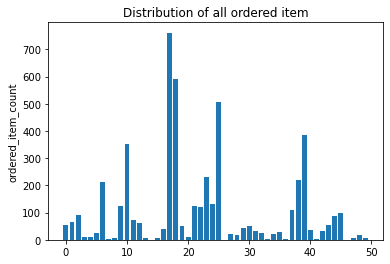

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# x축 작업(메뉴)
item_name_list = item_quantity.index.tolist() # 아이템 이름을 리스트로 저장
x_pos = np.arange(len(item_name_list)) # x_pos 변수에 아이템명 리스트의 요소 개수를 선언

# y축 작업(메뉴별 주문총량)
order_cnt = item_quantity.values.tolist() # order_cnt 변수에 아이템별 주문총량을 리스트로 저장

# 그래프 생성
plt.bar(x_pos, order_cnt, align='center') # x값, y값, 정렬방식
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

* 동일하게 상위 8개 정도 메뉴에 주문이 집중된 것을 확인할 수 있음

# Step4. 탐색적 분석: 스무고개로 개념적 탐색 분석하기

### 주문당 평균 지불액 구하기

In [21]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

* 한 사람당 평균적으로 18달러 정도 지불하는 것을 알 수 있음

### 한 주문에 10달러 이상 지불한 주문번호 출력

In [22]:
order_id_group = chipo.groupby('order_id').sum()
order_id_group

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [23]:
vip = order_id_group[order_id_group.item_price >= 10] # 지출액이 10달러 이상인 주문번호를 필터링해서 vip에 저장
vip.sort_values(by='item_price', ascending=False)[:10] # vip 중에서도 상위 10명 고객 출력

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
205,12,109.90
511,17,104.59
491,10,102.00
1449,11,95.39


In [24]:
vip.index.values # 주문번호 출력

array(['1', '10', '100', ..., '997', '998', '999'], dtype=object)

* 매장의 vip 고객 번호를 구할 수 있음

In [25]:
len(vip.index)

1834

* 4622번의 주문 중 1834번이 10달러 이상 주문, 약 3분의 1 정도

### 각 아이템의 가격 구하기

In [26]:
one_item = chipo[chipo.quantity == 1] # 아이템을 1개만 구매한 주문을 필터링
price_per_item = one_item.groupby('item_name').min() # 필터링된 주문들을 아이템 이름으로 그룹 생성후 최저가 계산
price_per_item.sort_values(by="item_price", ascending=False)[:10] # 아이템 가격을 내림차순 정렬 후 10개만 출력

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


### 아이템 가격 분포 그래프 출력하기

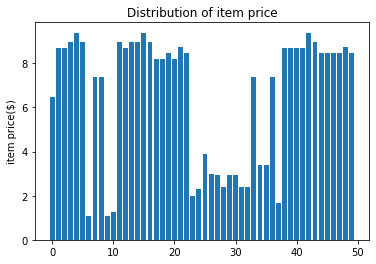

In [27]:
# x축 작업
item_list = price_per_item.index.tolist() # 위에서 구한 아이템 이름 컬럼을 item_list 변수에 리스트로 저장
x_pos = np.arange(len(item_list)) # item_list의 요소 개수만큼 x_pos에 선언

# y축 작업
item_price = price_per_item['item_price'].tolist() # 아이템별 가격을 item_price 변수에 리스트로 저장

# 그래프 생성
plt.bar(x_pos, item_price, align='center') # x축, y축, 정렬
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

### 아이템 가격 히스토그램 출력하기

In [45]:
# item_price

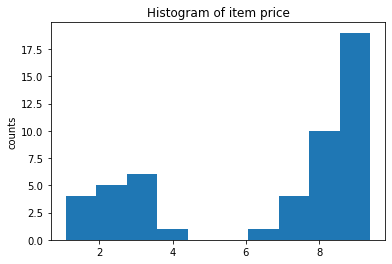

In [29]:
plt.hist(item_price) # x축이 가격, y축이 가격에 해당하는 아이템들의 개수
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

* 아이템 가격은 대략적으로 2에서 4달러 혹은 6에서 8달러 이렇게 두 그룹으로 나뉘는 것을 알 수 있다

### 가장 비싼 주문에서 판매된 아이템의 총 개수

In [30]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5] # 가장 비싼 주문 상위 5개

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


* 가장 비싼 주문에서는 23개의 아이템이 팔렸음을 알 수 있음

### Veggie Salad Bowl의 총 주문횟수

In [31]:
salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
len(salad)

18

In [32]:
# 총 주문 개수가 아닌 총 주문 횟수를 구해야 하므로 한 주문당 2개 이상 주문한 중복집계 제거
salad = salad.drop_duplicates(['item_name', 'order_id'])
len(salad)

18

### Chicken Bowl을 2개 이상 주문한 고객의 수

In [33]:
chicken = chipo[chipo['item_name']=='Chicken Bowl']
chicken

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [34]:
chicken_ordersum = chicken.groupby('order_id').sum()['quantity'] # 주문번호별 주문수량 합계
chicken_ordersum

order_id
10      1
1000    1
1004    2
1006    1
1008    1
       ..
991     1
992     1
995     1
997     2
998     1
Name: quantity, Length: 615, dtype: int64

In [35]:
chicken_result = chicken_ordersum[chicken_ordersum >= 2]
chicken_result.head(5)

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

In [36]:
len(chicken_result) # 치킨볼을 2개 이상 주문한 고객의 수

114

In [37]:
chicken_result.sum() # 치킨볼을 2개 이상 주문한 고객의 치킨볼 총 주문량 합계

260

### Chicken Bowl을 한번에 2개 이상 주문한 주문의 개수

In [38]:
chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chicken_result = chicken[chicken['quantity'] >= 2]
chicken_result.count()['order_id']

33

* 위와 다른점: 주문번호가 같으면 합쳐서 계산하느냐, 두 번에 나눠서 주문했으면 각각의 주문으로 보고 주문횟수를 구하느냐
* 즉 '고객' 기준으로 합쳐서 세느냐, '주문' 기준으로 따로 세느냐

* Chicken Bowl의 총 주문 횟수는 726회, 그 중 33회가 2개 이상 주문했음.  2개 이상 주문한 비중이 그닥 크지 않다고 생각할 수 있음
* 그러나 Chicken Bowl을 2개 이상 주문한 주문번호는 114명임. 그래도 6분의 1 정도 비율을 차지한다고 볼 수 있음

### 인사이트 총 정리

* Chicken Bowl이 압도적 판매량 1위
* Chicken Bowl의 총 주문 횟수는 726회, 그 중 33회가 2개 이상 주문했음.
* 상위 8개 정도 메뉴에 주문횟수와 주문량이 모두 집중됨
* 한 사람당 평균적으로 18달러 정도 지불
* 가장 비싼 주문에서는 23개의 아이템이 팔렸음
* 아이템 가격은 대략적으로 2에서 4달러 혹은 6에서 8달러 이렇게 두 그룹으로 나뉨
* 매장의 vip 고객번호 리스트 구했음